In [41]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

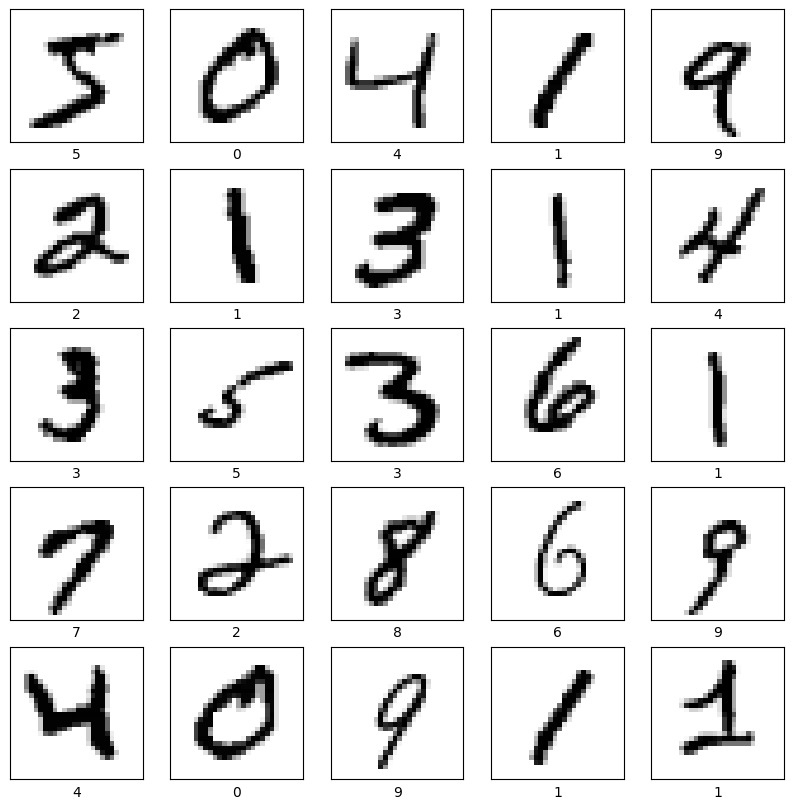

In [42]:
# load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

#display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [43]:
# Shape of first image at 0 index
train_images[0].shape, len(train_labels)

((28, 28), 60000)

In [44]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

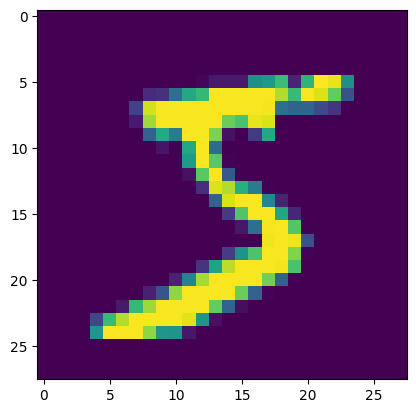

In [45]:
plt.imshow(train_images[0])

Text(0.5, 1.0, '5')

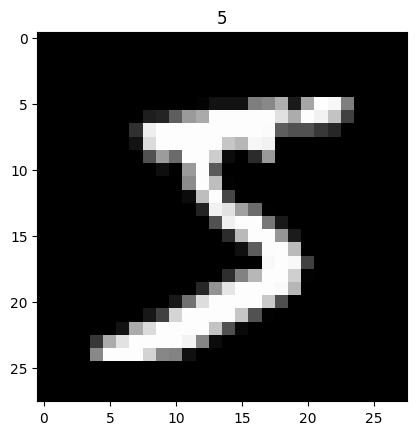

In [46]:
plt.imshow(train_images[0],cmap='gray')
plt.title(train_labels[0])

Text(0.5, 1.0, '9')

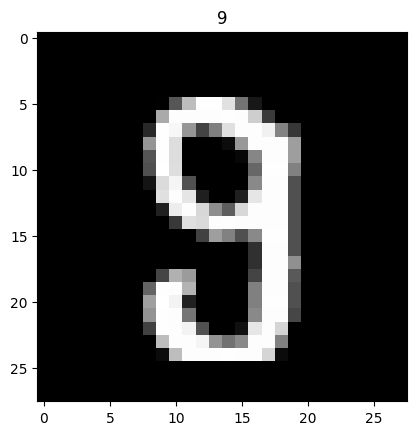

In [47]:
# to generate random image
import random
# r_image=random.randint(0,60000)
# OR
r_image=random.randint(0, len(train_images))
plt.imshow(train_images[r_image],cmap='gray')
plt.title(train_labels[r_image])

In [48]:
# print the values of pixels of image
for row in train_images[0]:
  for pixel in row:
    print("{:3}".format(pixel),end=' ')
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [49]:
# reshape the data as we dont't have 3rd value of an image

# train_images = train_images.reshape(train_images.shape+(1,))
# test_images = test_images.reshape(test_images.shape+(1,))
# OR

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [50]:
# Normalize the data between 0 & !
train_images = train_images / 255.0
test_images = test_images / 255.0

In [51]:
# Convert the normalization to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [52]:
# Build the model
from tensorflow.keras import layers

# Create an input layer
inputs = layers.Input(shape=(28,28,1))

model = keras.Sequential([
    inputs,  # input layer

    # layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),   # filter is the number of filters you want to apply
    # OR                                                               # kernel is the size of window/filter moving over image

    layers.Conv2D(32,(3,3),activation='relu'),  # convolutional layer
    layers.Conv2D(32,(3,3),activation='relu'),  # convolutional layer
    layers.MaxPooling2D((2,2)),                 # pooling layer
    layers.Conv2D(64,(3,3),activation='relu'),  # convolutional layer
    layers.Conv2D(64,(3,3),activation='relu'),  # convolutional layer
    layers.MaxPooling2D((2,2)),                 # pooling layer
    layers.Flatten(),                           # flatten layer
    layers.Dense(10,activation='softmax')       # output layer
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,242 (293.91 KB)

 Trainable params: 75,242 (293.91 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# train the model
history = model.fit(train_images,train_labels,epochs=5,validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9009 - loss: 0.3029 - val_accuracy: 0.9865 - val_loss: 0.0473
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9857 - loss: 0.0453 - val_accuracy: 0.9905 - val_loss: 0.0378
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9885 - val_loss: 0.0447
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9941 - loss: 0.0169 - val_accuracy: 0.9905 - val_loss: 0.0361


In [55]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9884 - loss: 0.0337
Test accuracy: 0.9908999800682068
Test loss: 0.026960723102092743


In [56]:
# save the model
model.save('mnist_model.keras')

In [57]:
# Predict on test images
predictions = model.predict(test_images)

# Get the predicted class for each test image
predicted_classes = np.argmax(predictions, axis=1)

# Compare predicted vs actual
print("Predicted:", predicted_classes[:5])
print("Actual:   ", test_labels[:5])  # No argmax needed


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: [7 2 1 0 4]
Actual:    [7 2 1 0 4]


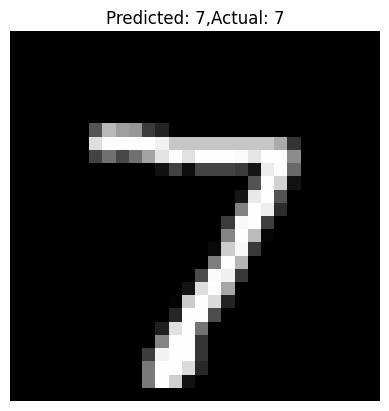

In [58]:
import matplotlib.pyplot as plt

# Show the first image and actual & prediction label
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_classes[0]},Actual: {test_labels[0]}")
plt.axis('off')
plt.show()


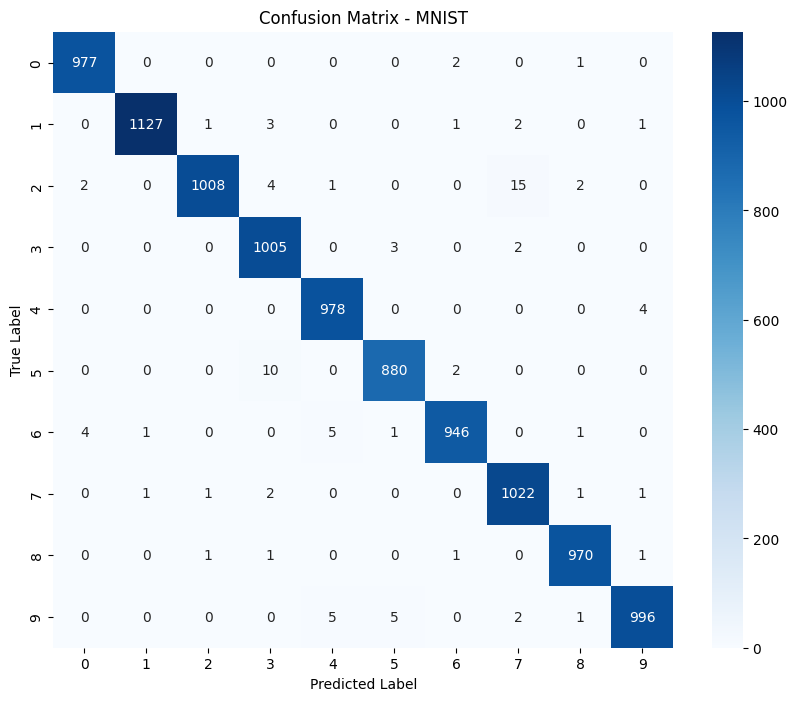

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST')
plt.show()

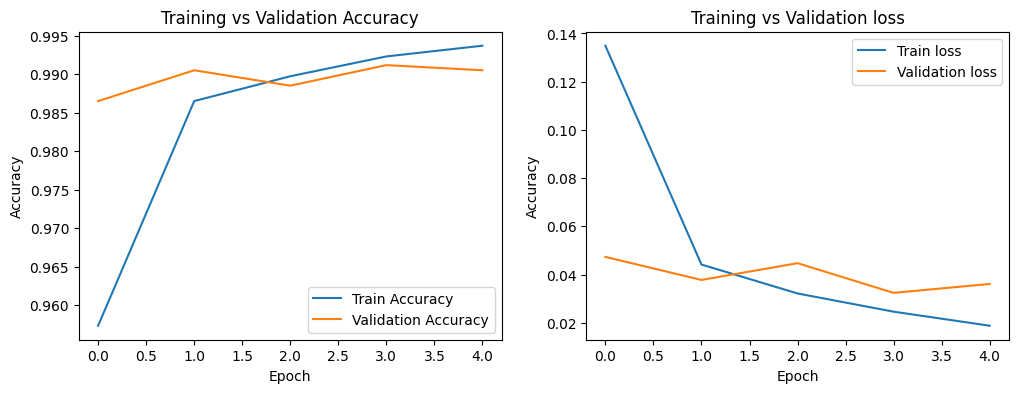

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Training vs Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()